# PRCP-1024-TexasSalaryPrediction

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('salary.csv')
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGENCY,149481.0,545.736288,139.057691,101.0,529.00,530.00,696.00,9.300000e+02
HRLY RATE,149481.0,0.346488,4.211485,0.0,0.00,0.00,0.00,1.177885e+02
HRS PER WK,149481.0,39.714918,2.323855,1.0,40.00,40.00,40.00,7.000000e+01
MONTHLY,149481.0,4226.184248,2093.111691,50.0,3019.84,3720.17,4865.81,4.612500e+04
ANNUAL,149481.0,50714.210973,25117.340292,600.0,36238.08,44642.04,58389.72,5.535000e+05
STATE NUMBER,149481.0,565193.023521,478621.220542,1.0,113334.00,346373.00,1100500.00,1.271604e+06
multiple_full_time_jobs,14.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.000000e+00
summed_annual_salary,16.0,74303.955000,51925.944282,18000.0,32962.50,48063.30,123751.77,1.713834e+05


In [5]:
df.isnull().sum()/len(df)

AGENCY                     0.000000
AGENCY NAME                0.000000
LAST NAME                  0.000000
FIRST NAME                 0.000000
MI                         0.000000
CLASS CODE                 0.000000
CLASS TITLE                0.000000
ETHNICITY                  0.000000
GENDER                     0.000000
STATUS                     0.000000
EMPLOY DATE                0.000000
HRLY RATE                  0.000000
HRS PER WK                 0.000000
MONTHLY                    0.000000
ANNUAL                     0.000000
STATE NUMBER               0.000000
duplicated                 0.999043
multiple_full_time_jobs    0.999906
combined_multiple_jobs     0.999351
summed_annual_salary       0.999893
hide_from_search           0.999893
dtype: float64

There are few 99% null deatures, so we need to remove them from the dataset, as they're not useful

In [6]:
df.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [7]:
df = df.drop(['duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'], axis = 1)

In [8]:
df.isnull().sum()/len(df)

AGENCY          0.0
AGENCY NAME     0.0
LAST NAME       0.0
FIRST NAME      0.0
MI              0.0
CLASS CODE      0.0
CLASS TITLE     0.0
ETHNICITY       0.0
GENDER          0.0
STATUS          0.0
EMPLOY DATE     0.0
HRLY RATE       0.0
HRS PER WK      0.0
MONTHLY         0.0
ANNUAL          0.0
STATE NUMBER    0.0
dtype: float64

# EDA

## Scatterplot for each continious variable vs target

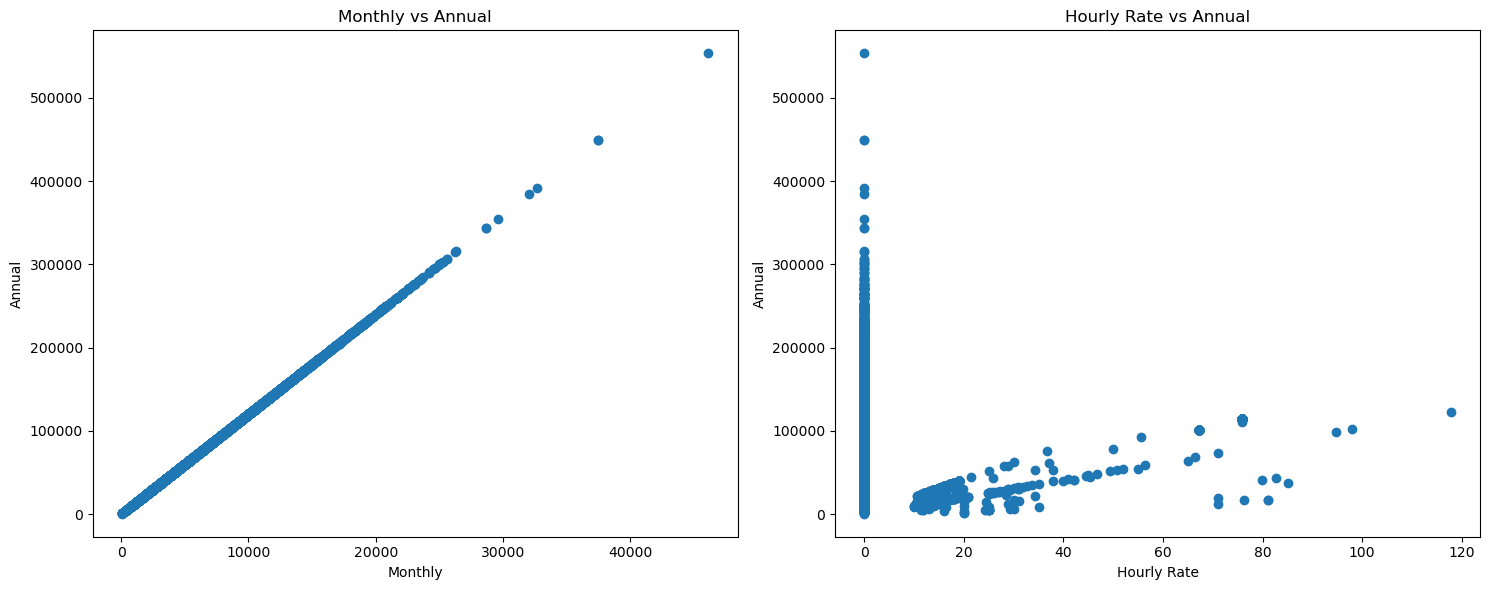

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame with columns 'MONTHLY', 'ANNUAL', and 'HRLY RATE'

# Creating subplots for scatterplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Scatterplot 1 - Upper Left
axs[0].scatter(df['MONTHLY'], df['ANNUAL'])
axs[0].set_title('Monthly vs Annual')
axs[0].set_xlabel('Monthly')
axs[0].set_ylabel('Annual')

# Scatterplot 2 - Upper Right
axs[1].scatter(df['HRLY RATE'], df['ANNUAL'])
axs[1].set_title('Hourly Rate vs Annual')
axs[1].set_xlabel('Hourly Rate')
axs[1].set_ylabel('Annual')

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()


##### Annual and mothly are highly correlated

Text(0.5, 1.0, 'Annual vs Hours per week')

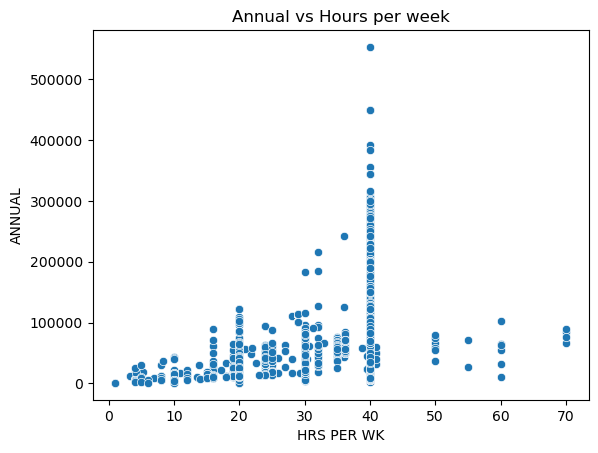

In [10]:
sns.scatterplot(x = 'HRS PER WK', y = 'ANNUAL', data = df)
plt.title('Annual vs Hours per week')

## Pair plot

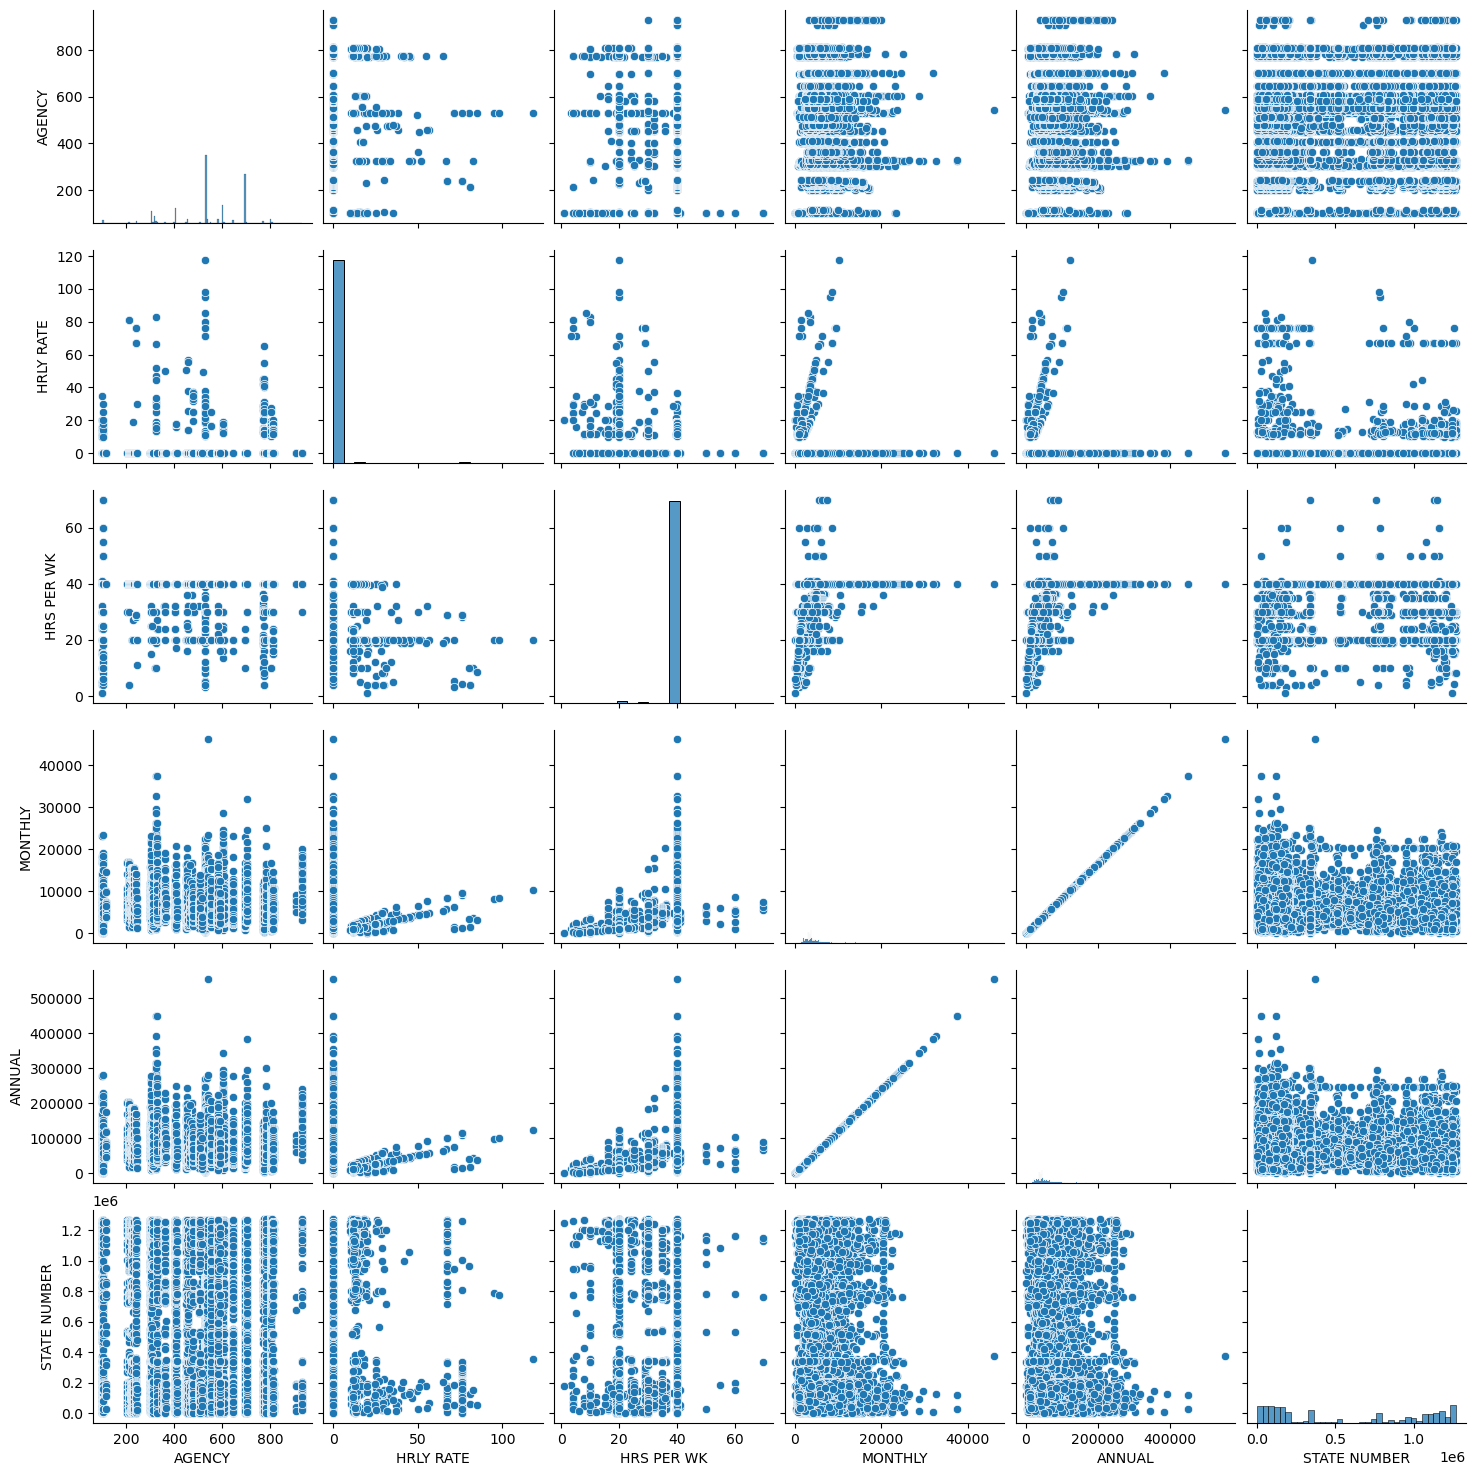

In [11]:
sns.pairplot(data = df)

## Count plot of Gender and ethnicity

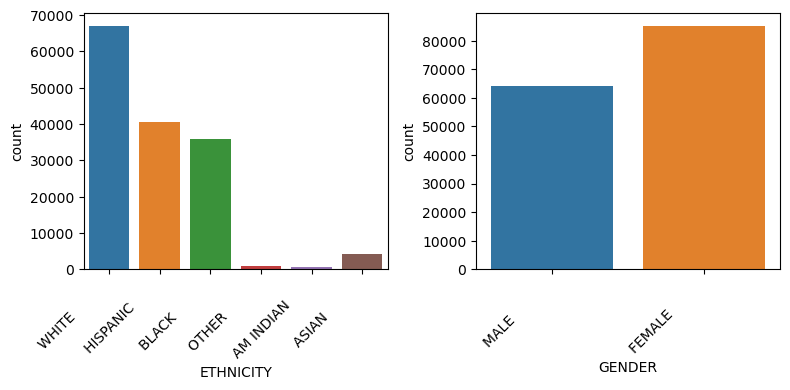

In [13]:


# Create a single figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot the countplot for 'ETHNICITY' in the first subplot
sns.countplot(x='ETHNICITY', data=df, ax=axs[0])

# Adjust x-axis ticks for 'ETHNICITY' subplot
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')  # Adjust rotation as needed

# Plot the countplot for 'GENDER' in the second subplot
sns.countplot(x='GENDER', data=df, ax=axs[1])

# Adjust x-axis ticks for 'GENDER' subplot
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')  # Adjust rotation as needed

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


In [16]:
df['ETHNICITY'].value_counts()

WHITE              67142
HISPANIC           40585
BLACK              35853
ASIAN               4268
OTHER                921
AM INDIAN            712
Name: ETHNICITY, dtype: int64

In [17]:
df['GENDER'].value_counts()

FEMALE             85328
MALE               64153
Name: GENDER, dtype: int64

## Status value counts and count plot

In [18]:
df['STATUS'].value_counts()

CRF - CLASSIFIED REGULAR FULL-TIME          142502
URF - UNCLASSIFIED REGULAR FULL-TIME          2363
CRP - CLASSIFIED REGULAR PART-TIME            1531
CTF - CLASSIFIED TEMPORARY FULL-TIME          1096
URP - UNCLASSIFIED REGULAR PART-TIME           950
ERF - EXEMPT REGULAR FULL-TIME                 923
CTP - CLASSIFIED TEMPORARY PART-TIME            81
UTP - UNCLASSIFIED TEMPORARY PART-TIME          21
UTF - UNCLASSIFIED TEMPORARY FULL-TIME          12
ERP - EXEMPT REGULAR PART-TIME                   1
CTP - CLASSIFIED TEMPORARY FULL-TIME             1
Name: STATUS, dtype: int64

In [20]:
status_visual

,Status,Count
0,CRF - CLASSIFIED REGULAR FULL-TIME,142502
1,URF - UNCLASSIFIED REGULAR FULL-TIME,2363
2,CRP - CLASSIFIED REGULAR PART-TIME,1531
3,CTF - CLASSIFIED TEMPORARY FULL-TIME,1096
4,URP - UNCLASSIFIED REGULAR PART-TIME,950
5,ERF - EXEMPT REGULAR FULL-TIME,923
6,CTP - CLASSIFIED TEMPORARY PART-TIME,81
7,UTP - UNCLASSIFIED TEMPORARY PART-TIME,21
8,UTF - UNCLASSIFIED TEMPORARY FULL-TIME,12
9,ERP - EXEMPT REGULAR PART-TIME,1


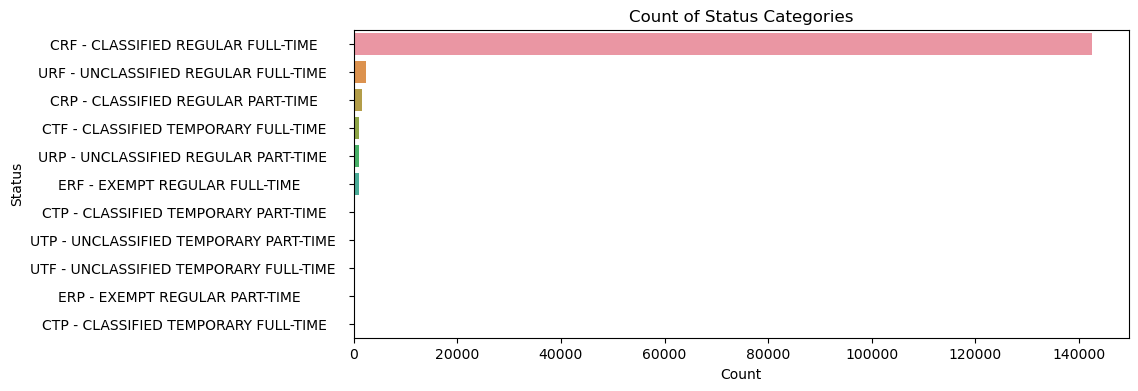

In [19]:
status_counts = df['STATUS'].value_counts()
status_visul = pd.DataFrame(status_counts)
status_visual = pd.DataFrame({'Status': status_counts.index, 'Count': status_counts.values})

# Plotting using Seaborn's barplot
plt.figure(figsize=(10, 4))
sns.barplot(x='Count', y='Status', data=status_visual)
plt.title('Count of Status Categories')
plt.xlabel('Count')
plt.ylabel('Status')
plt.show()

## Class title value counts

In [23]:
df['CLASS TITLE'].value_counts()

CORREC  OFFICER IV                                    9267
CORREC  OFFICER V                                     7895
CORREC OFFCR III                                      4718
TEXAS WORKS ADVISOR II                                3646
DIRECT SUPPORT PROFESSIONAL I                         3307
                                                      ... 
CHAIR,PARDONS AND PAROLES                                1
STATISTICIAN II                                          1
EX DIRECTOR TDCJ                                         1
PAYROLL SPECIALIST I                                     1
DEPUTY DIR/APPS MGR                                      1
Name: CLASS TITLE, Length: 1422, dtype: int64

In [24]:
df['CLASS TITLE'].nunique()

1422

## Agency name value counts

In [15]:
df['AGENCY NAME'].value_counts().sort_values(ascending=False)


HEALTH AND HUMAN SERVICES COMMISSION                  36667
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                  35926
TEXAS DEPARTMENT OF TRANSPORTATION                    13099
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES          12588
DEPARTMENT OF PUBLIC SAFETY                           10097
                                                      ...  
HEALTH PROFESSIONS COUNCIL                                7
BOARD OF PROFESSIONAL GEOSCIENTISTS                       5
OFFICE OF STATE PROSECUTING ATTORNEY                      4
BOARD OF PROFESSIONAL LAND SURVEYING                      4
TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL                 1
Name: AGENCY NAME, Length: 113, dtype: int64

## Top 15 agency value counts

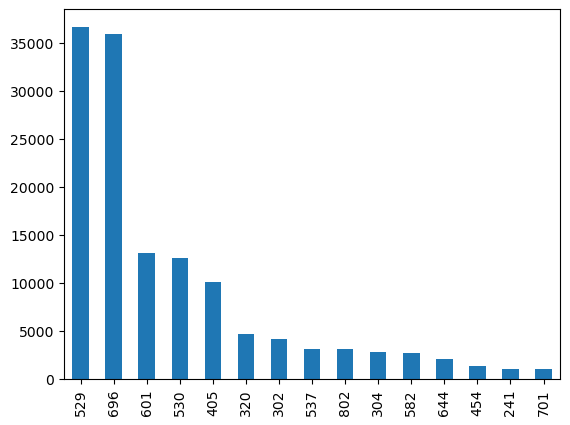

In [17]:
df['AGENCY'].value_counts()[:15].plot(kind = 'bar');

# Univariate analysis

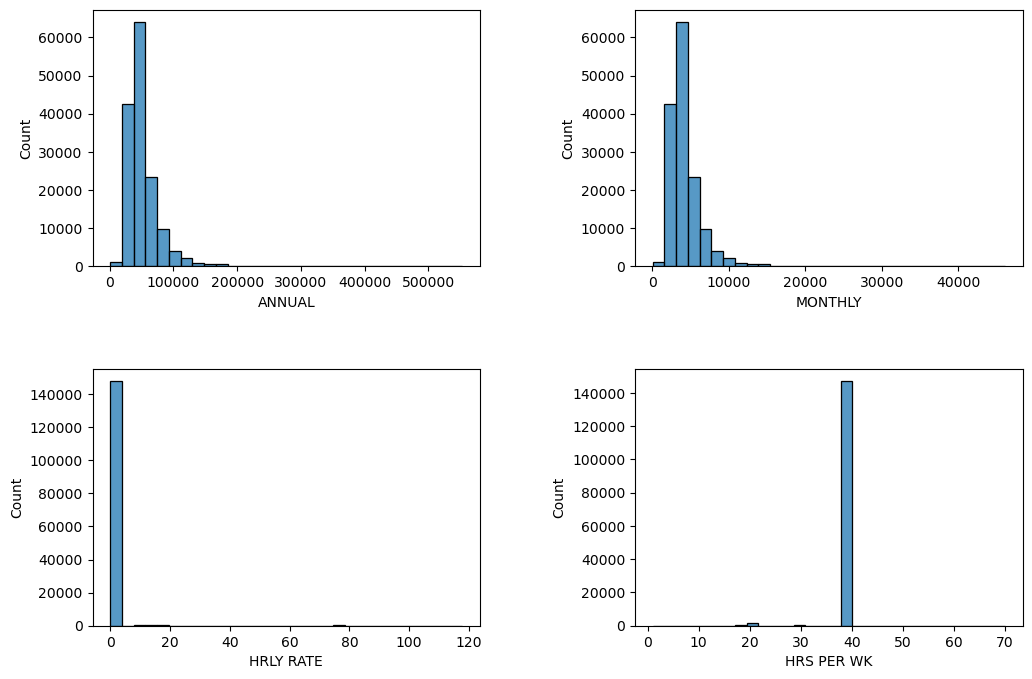

In [14]:


# Create a 2x2 grid of subplots
fig, axis = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms in each subplot
sns.histplot(x='ANNUAL', data=df, bins=30, ax=axis[0, 0])
sns.histplot(x='MONTHLY', data=df, bins=30, ax=axis[0, 1])
sns.histplot(x='HRLY RATE', data=df, bins=30, ax=axis[1, 0])
sns.histplot(x='HRS PER WK', data=df, bins=30, ax=axis[1, 1])

# Adjusting layout with space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust the values as needed

# Display the plot
plt.show()


## Average Annual salary of male and female

<Figure size 800x400 with 0 Axes>

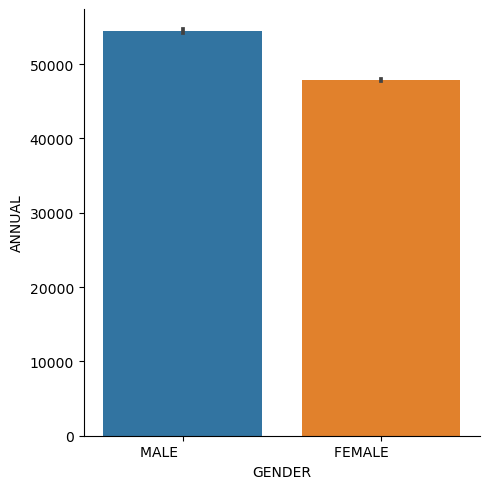

In [28]:
plt.figure(figsize = (8,4))
sns.catplot(x = 'GENDER', y = 'ANNUAL', data = df, kind = 'bar')


## Average annual salary by ethnicity wise

<Figure size 800x400 with 0 Axes>

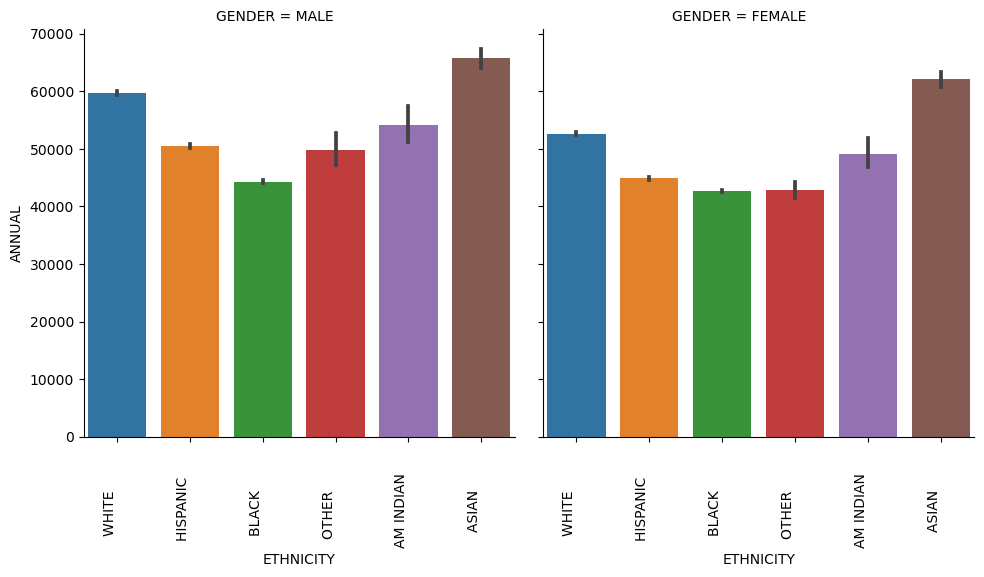

In [29]:
plt.figure(figsize = (8,4))
g = sns.catplot(x = 'ETHNICITY', y = 'ANNUAL', data = df, kind = 'bar', col = 'GENDER')
# Adjust x-axis ticks for each subplot individually
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
    ax.margins(x=0.01)

## Avg Annual salary by Status wise

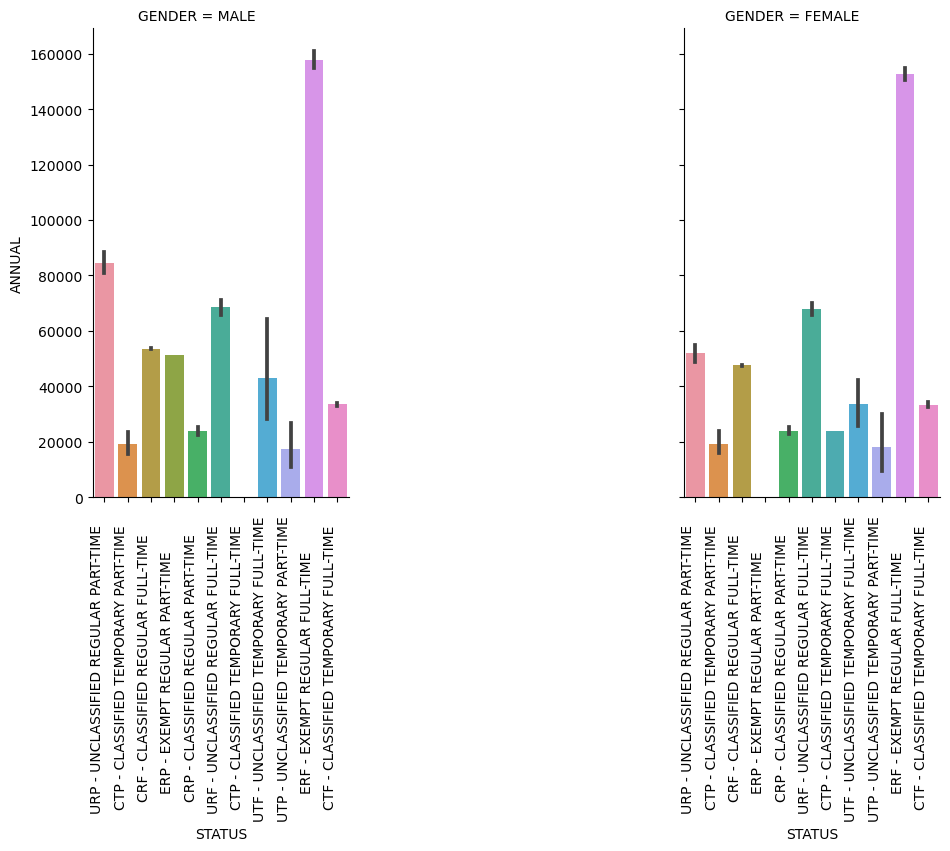

In [23]:
g = sns.catplot(x = 'STATUS', y = 'ANNUAL', data = df, col ='GENDER', kind = 'bar')

plt.gcf().subplots_adjust(bottom=0.15)

# Adjust x-axis ticks for each subplot individually
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
    ax.margins(x=0.01)  # Adjust margins if needed to prevent cutoff

# Set figure size
g.fig.set_size_inches(12, 6)

# Display the plot
plt.show()


## Avg Hours per week by gender and ethnicity wise


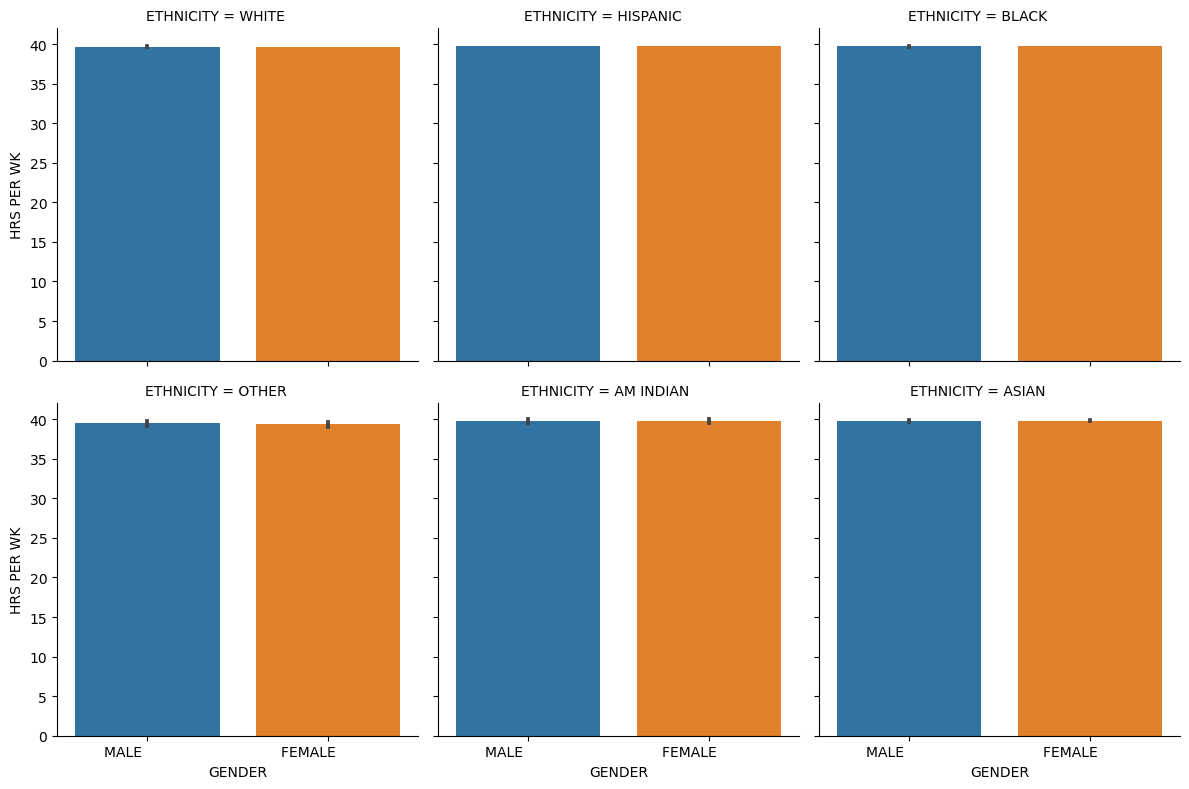

In [25]:
sns.catplot(x = 'GENDER', y = 'HRS PER WK', data = df, col = 'ETHNICITY', kind = 'bar', col_wrap = 3, height = 4)

## Avg hourly rate by gender and ethnicity wise

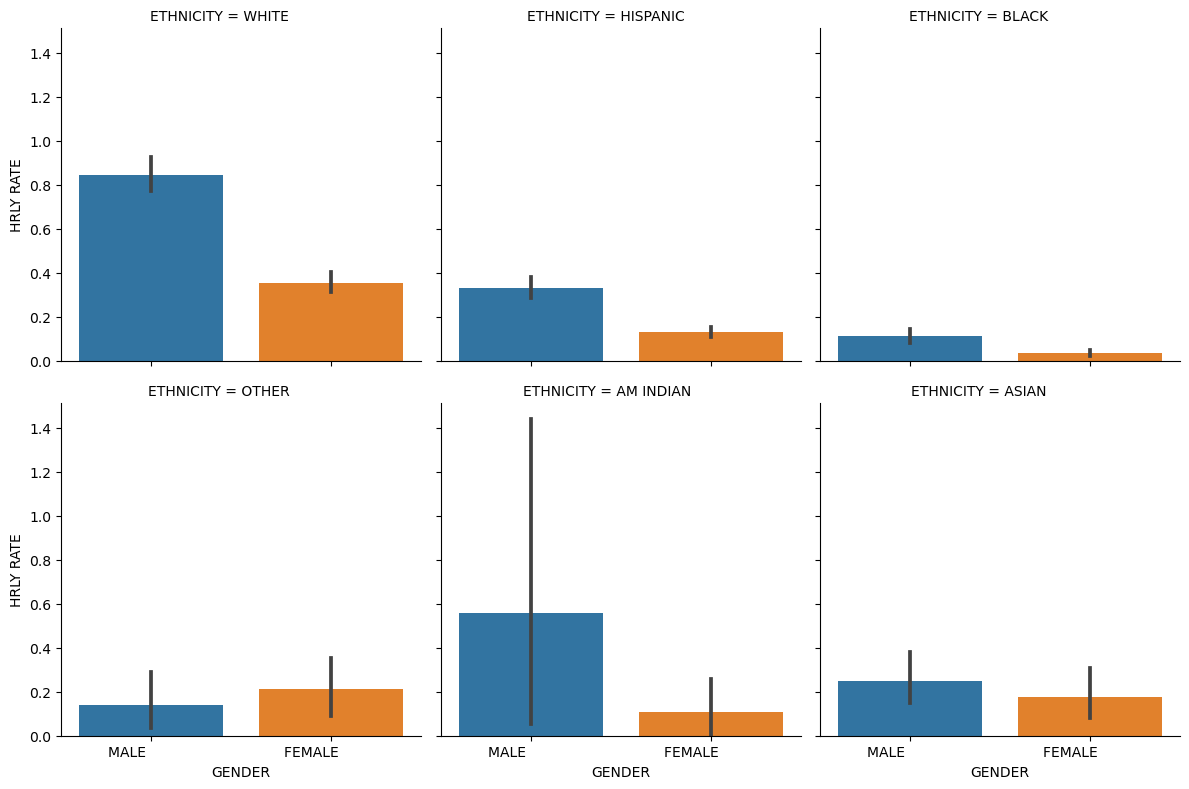

In [33]:
sns.catplot(x = 'GENDER', y = 'HRLY RATE', data = df, col = 'ETHNICITY', kind = 'bar', col_wrap = 3, height = 4)

In [35]:
df.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER'],
      dtype='object')

In [18]:
df['AGENCY NAME'].value_counts()

HEALTH AND HUMAN SERVICES COMMISSION                  36667
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                  35926
TEXAS DEPARTMENT OF TRANSPORTATION                    13099
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES          12588
DEPARTMENT OF PUBLIC SAFETY                           10097
                                                      ...  
HEALTH PROFESSIONS COUNCIL                                7
BOARD OF PROFESSIONAL GEOSCIENTISTS                       5
OFFICE OF STATE PROSECUTING ATTORNEY                      4
BOARD OF PROFESSIONAL LAND SURVEYING                      4
TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL                 1
Name: AGENCY NAME, Length: 113, dtype: int64

## Top 5 agency names and their salaries

In [19]:

# Get the top 5 categories based on value counts
top_5_agencies = df['AGENCY NAME'].value_counts().head(5).index.tolist()

# Filter the DataFrame for the top 5 categories
df_top_5 = df[df['AGENCY NAME'].isin(top_5_agencies)]


In [20]:
df.groupby('AGENCY NAME')['ANNUAL'].mean().sort_values(ascending = False)

AGENCY NAME
COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION     138298.202091
TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL             120000.000000
TREASURY SAFEKEEPING TRUST COMPANY                    117943.637746
CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS     117206.127273
FOURTEENTH COURT OF APPEALS DISTRICT                  112452.993000
                                                          ...      
SCHOOL FOR THE BLIND AND VISUALLY IMPAIRED             42852.887368
HEALTH AND HUMAN SERVICES COMMISSION                   41851.890192
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                   41157.350070
HOUSE OF REPRESENTATIVES                               40884.925122
STATE PRESERVATION BOARD                               40858.390588
Name: ANNUAL, Length: 113, dtype: float64

In [21]:
mean_salary_by_agency = df.groupby('AGENCY NAME')['ANNUAL'].mean().sort_values(ascending=False)
top_5_agencies = mean_salary_by_agency.head(5).index.tolist()
df_top_5 = df[df['AGENCY NAME'].isin(top_5_agencies)]

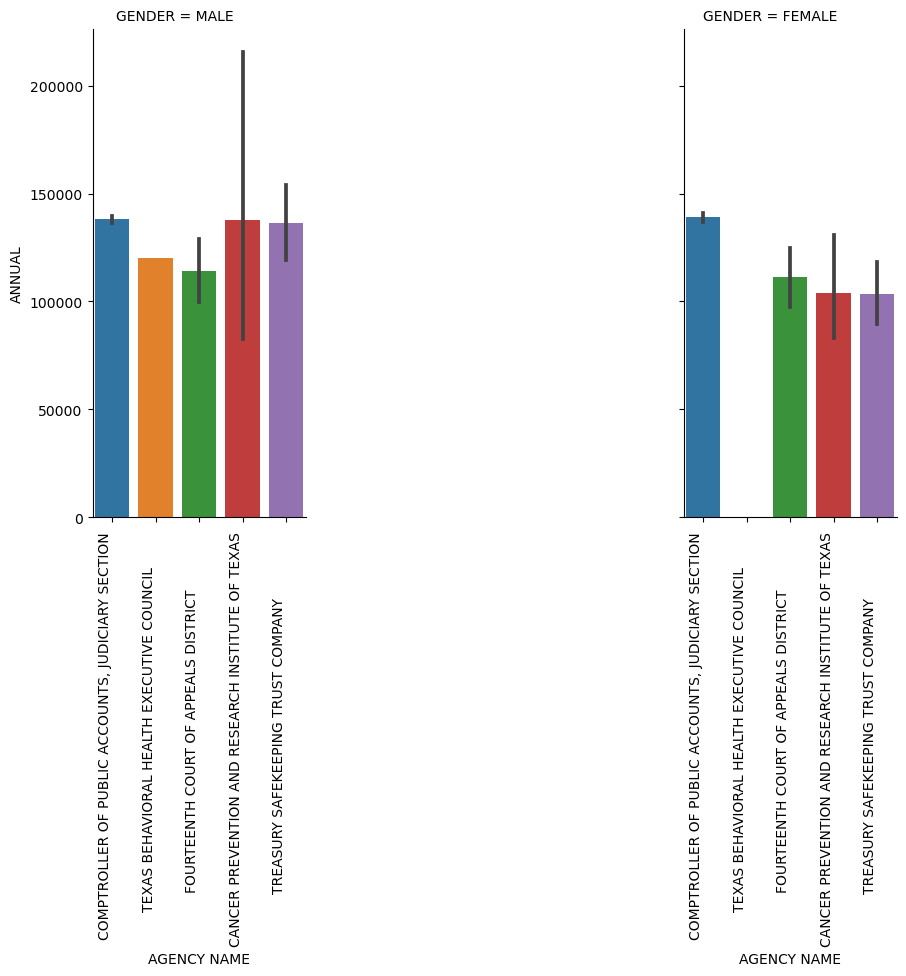

In [27]:
g = sns.catplot(x = 'AGENCY NAME', y = 'ANNUAL', data = df_top_5, col ='GENDER', kind = 'bar')
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
    ax.margins(x=0.01)  # Adjust margins if needed to prevent cutoff

# Set figure size
g.fig.set_size_inches(12, 6)

# Display the plot
plt.show()

In [40]:
df.sort_values("ANNUAL", ascending=False).groupby(["AGENCY NAME","STATUS","CLASS TITLE"]).mean()

AGENCY  \
AGENCY NAME                                        STATUS                                   CLASS TITLE                                                  
ALCOHOLIC BEVERAGE COMMISSION                      CRF - CLASSIFIED REGULAR FULL-TIME       ACCOUNTANT I                                         458.0   
                                                                                            ACCOUNTANT II                                        458.0   
                                                                                            ACCOUNTANT IV                                        458.0   
                                                                                            ACCOUNTANT VI                                        458.0   
                                                                                            ACCTS EXAM I                                         458.0   
...                                                                                                                                                ...   
WATER DEVELOPMENT BOARD                            CRP - CLASSIFIED REGULAR PART-TIME       DATA BASE ADMINISTRATOR IV                           580.0   
                                                                                            ENGINEER IV                                          580.0   
                                                   CTF - CLASSIFIED TEMPORARY FULL-TIME     ADMINISTRATIVE ASST I                                580.0   
                                                   ERF - EXEMPT REGULAR FULL-TIME           BOARD MEMBER                                         580.0   
                                                                                            EXECUTIVE ADMINISTRATOR, WATER                       580.0   

                                                                                                                                                HRLY RATE  \
AGENCY NAME                                        STATUS                                   CLASS TITLE                                                     
ALCOHOLIC BEVERAGE COMMISSION                      CRF - CLASSIFIED REGULAR FULL-TIME       ACCOUNTANT I                                              0.0   
                                                                                            ACCOUNTANT II                                             0.0   
                                                                                            ACCOUNTANT IV                                             0.0   
                                                                                            ACCOUNTANT VI                                             0.0   
                                                                                            ACCTS EXAM I                                              0.0   
...                                                                                                                                                   ...   
WATER DEVELOPMENT BOARD                            CRP - CLASSIFIED REGULAR PART-TIME       DATA BASE ADMINISTRATOR IV                                0.0   
                                                                                            ENGINEER IV                                               0.0   
                                                   CTF - CLASSIFIED TEMPORARY FULL-TIME     ADMINISTRATIVE ASST I                                     0.0   
                                                   ERF - EXEMPT REGULAR FULL-TIME           BOARD MEMBER                                              0.0   
                                                                                            EXECUTIVE ADMINISTRATOR, WATER                            0.0   

                                                                                                   

# Analyzing outliers

In [41]:
df.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER'],
      dtype='object')

## Finding outliers in the salary

In [23]:
df['ANNUAL'].describe()

count    149481.000000
mean      50714.210973
std       25117.340292
min         600.000000
25%       36238.080000
50%       44642.040000
75%       58389.720000
max      553500.000000
Name: ANNUAL, dtype: float64

In [24]:
Outlier_in_salaries = df[(df['ANNUAL']>58389) | (df['ANNUAL']<36238)]['CLASS TITLE'].unique()
(Outlier_in_salaries.tolist())

['JUDGE, RETIRED                                    ',
 'GENERAL COUNSEL IV                                ',
 'DIRECTOR IV                                       ',
 'CONTRACT SPEC IV                                  ',
 'INSPECTOR II                                      ',
 'PROGRAM SPECIALIST V                              ',
 'PROGRAM SPECIALIST VI                             ',
 'VEHICLE DRIVER II                                 ',
 'RESIDENT SPECIALIST II                            ',
 'RESIDENT SPECIALIST III                           ',
 'LIBRARY ASST III                                  ',
 'ADMINISTRATIVE ASST III                           ',
 'ADMINISTRATIVE ASST II                            ',
 'VEHICLE DRIVER III                                ',
 'NURSE II                                          ',
 'HOURLY/SUBSTITUTES                                ',
 'RESIDENT SPECIALIST I                             ',
 'SUBSTITUTE WORKERS                                ',
 'LEGISLAT

## Removing outliers in salary

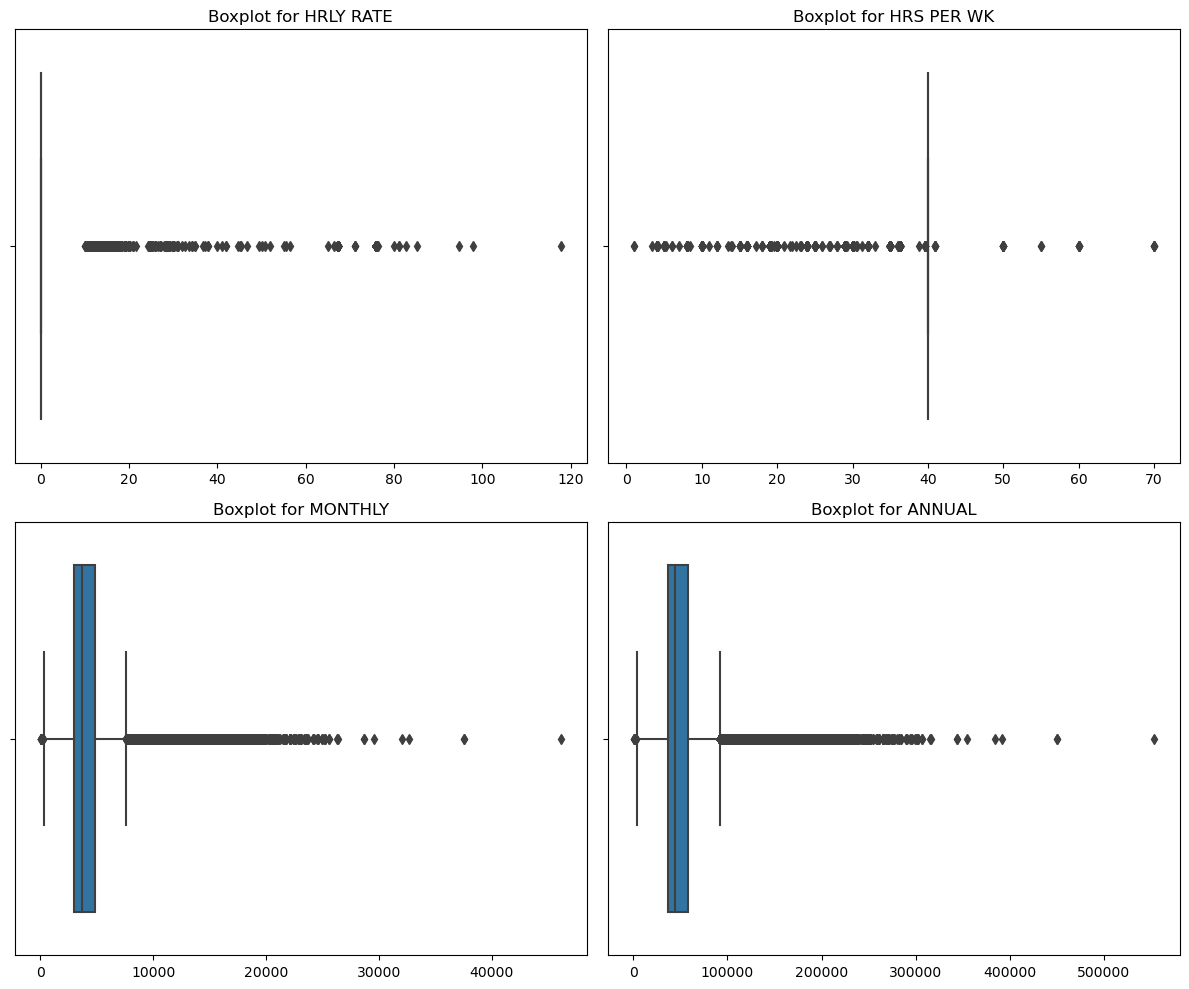

In [42]:
features = ['HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL']

# Creating subplots for box plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Creating box plots for each feature in subplots
for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot for {feature}')
    axes[i].set_xlabel('')

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()

In [43]:
def find_boundaries(variable):
    
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3 - q1
    lower_range = q1 - 1.5 * iqr #used to find the minimum value
    upper_range = q3 + 1.5 * iqr#max value
    return lower_range, upper_range

In [44]:
lower_ANNUAL, upper_ANNUAL = find_boundaries('ANNUAL')
print(lower_ANNUAL, upper_ANNUAL)

#capp the outlier / censoring the outlier
df.ANNUAL = np.where( df.ANNUAL > upper_ANNUAL, upper_ANNUAL, df.ANNUAL )
df.ANNUAL = np.where( df.ANNUAL < lower_ANNUAL, lower_ANNUAL, df.ANNUAL )

3010.6200000000026 91617.18


In [45]:
lower_MONTHLY, upper_MONTHLY = find_boundaries('MONTHLY')
print(lower_MONTHLY, upper_MONTHLY)

#capp the outlier / censoring the outlier
df.MONTHLY = np.where( df.MONTHLY > upper_MONTHLY, upper_MONTHLY, df.MONTHLY )
df.MONTHLY = np.where( df.MONTHLY < lower_MONTHLY, lower_MONTHLY, df.MONTHLY )

250.88499999999976 7634.765000000001


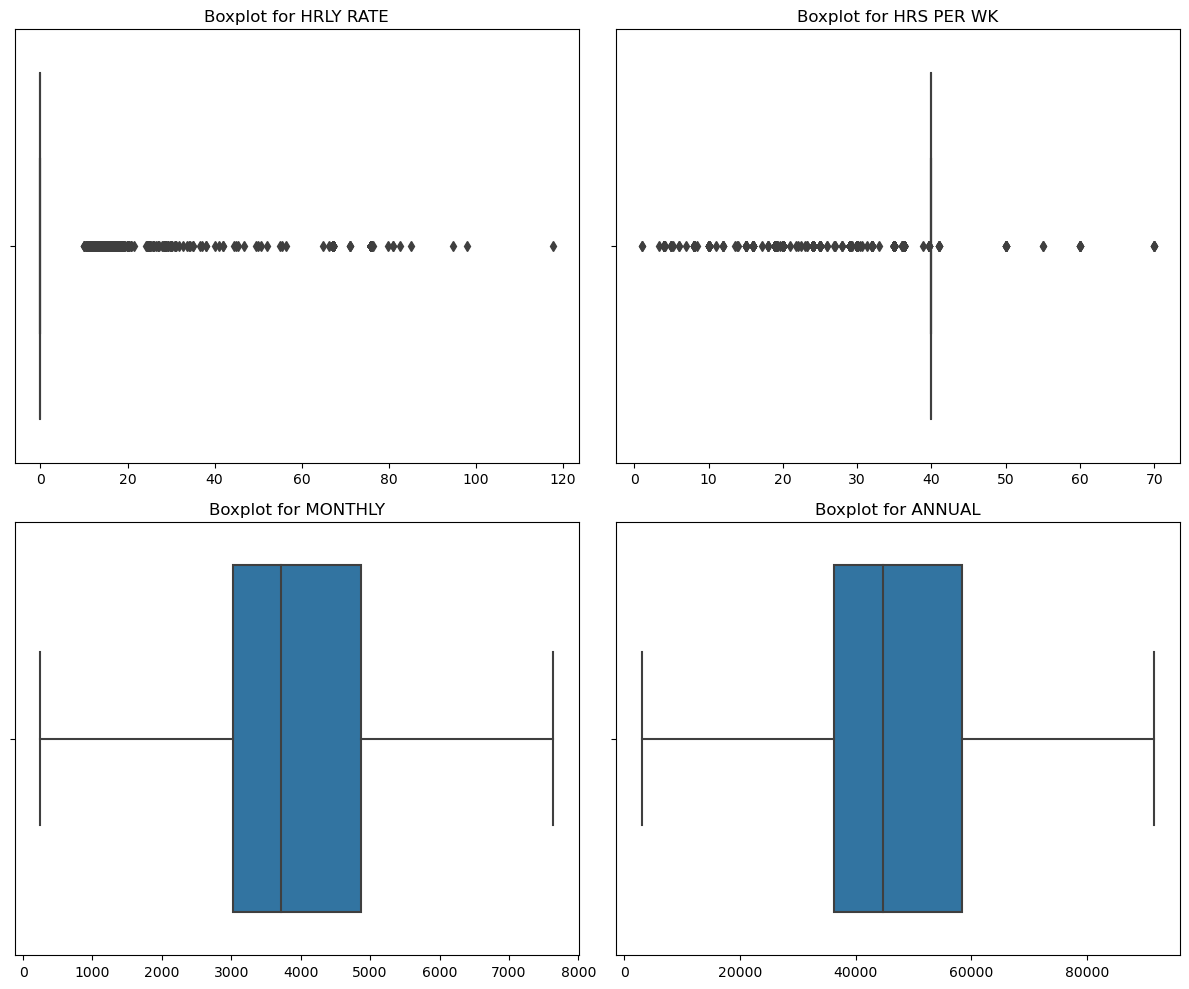

In [46]:
features = ['HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL']

# Creating subplots for box plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Creating box plots for each feature in subplots
for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot for {feature}')
    axes[i].set_xlabel('')

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()

<Axes: xlabel='ANNUAL', ylabel='Count'>

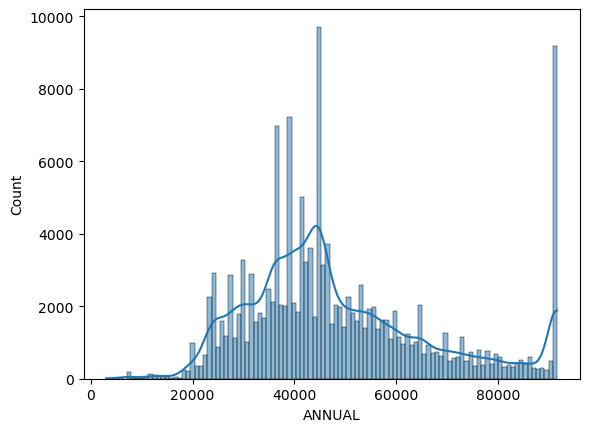

In [47]:
sns.histplot(x = 'ANNUAL', data = df, kde = True)

In [48]:
df.shape

(149481, 16)

In [49]:
df.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER'],
      dtype='object')

## Correlation between contious features

In [50]:
con_features = df[['HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL']].corr()
con_features

,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL
HRLY RATE,1.000000,-0.337784,0.071839,0.071839
HRS PER WK,-0.337784,1.000000,0.132252,0.132252
MONTHLY,0.071839,0.132252,1.000000,1.000000
ANNUAL,0.071839,0.132252,1.000000,1.000000


<Axes: >

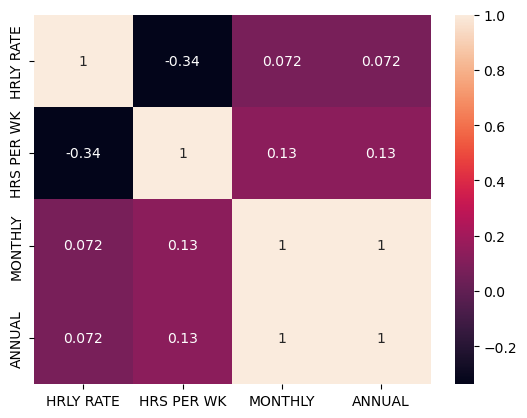

In [51]:
sns.heatmap(con_features, annot  = True)

#### As we expected mothly and Annual features are highly correlated, so can drop any one of the feature, we'll drop monthly feature

In [52]:
df.drop('MONTHLY', axis = 1, inplace = True)

In [53]:
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,ANNUAL,STATE NUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,91617.18,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,16857.24,127717
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,91617.18,59115
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,16857.24,59115
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,39411.24,165030


## Wage disparities

<function matplotlib.pyplot.show(close=None, block=None)>

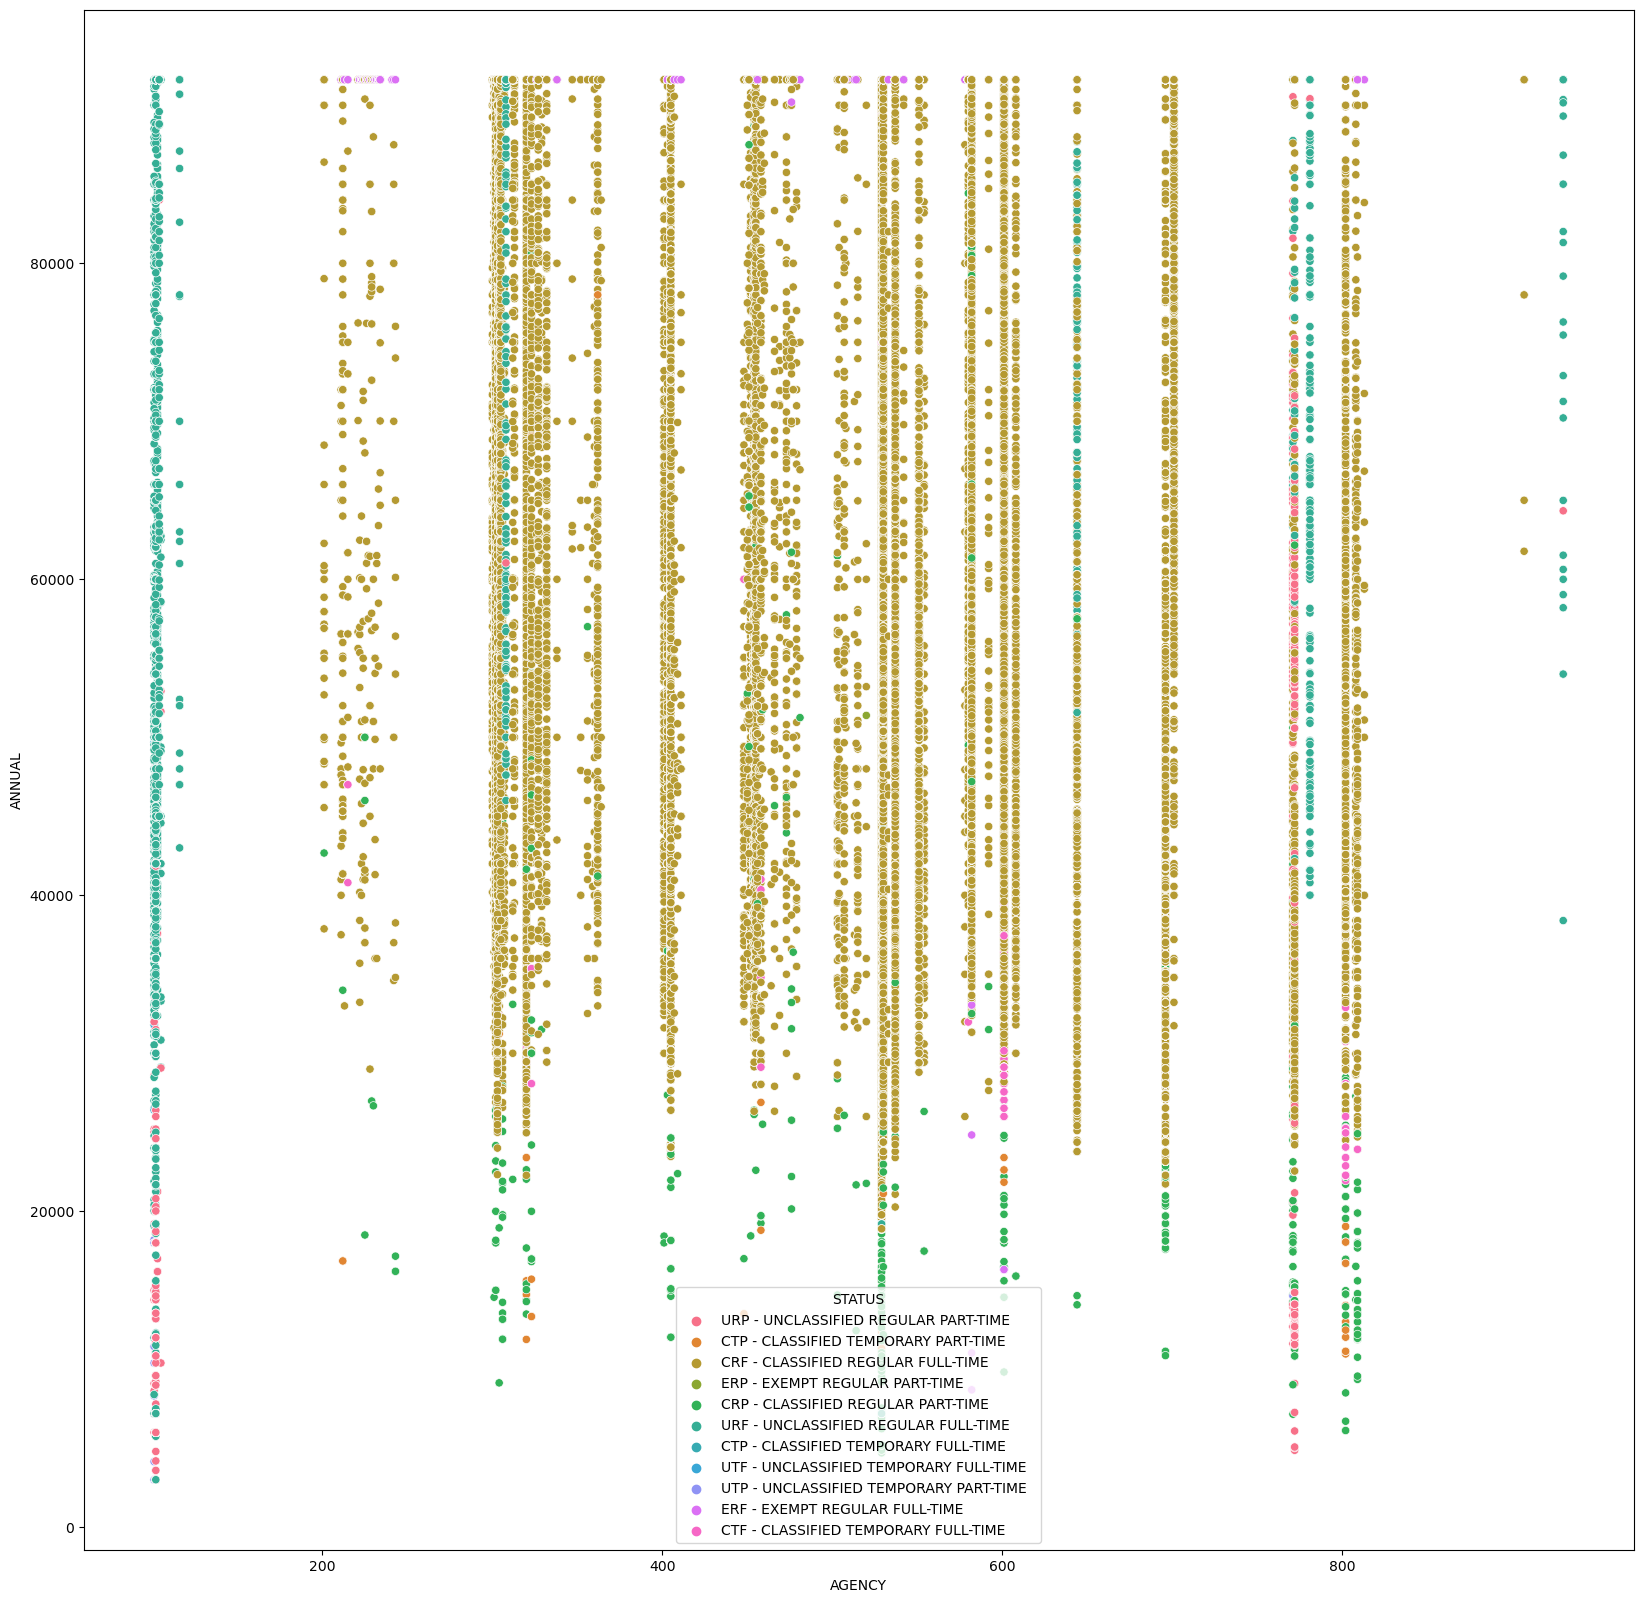

In [54]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='AGENCY', y='ANNUAL', data=df, hue='STATUS')
plt.show

In [55]:
pd.pivot_table(df, index = ['STATUS','AGENCY NAME'], values = 'ANNUAL')

ANNUAL
STATUS                                   AGENCY NAME                                                     
CRF - CLASSIFIED REGULAR FULL-TIME       ALCOHOLIC BEVERAGE COMMISSION                       59252.214010
                                         BOARD OF ARCHITECTURAL EXAMINERS                    75275.407500
                                         BOARD OF CHIROPRACTIC EXAMINERS                     59073.386667
                                         BOARD OF DENTAL EXAMINERS                           51077.962909
                                         BOARD OF EXAMINERS OF PSYCHOLOGISTS                 48445.975385
...                                                                                                   ...
UTF - UNCLASSIFIED TEMPORARY FULL-TIME   TEXAS LEGISLATIVE COUNCIL                           91617.180000
UTP - UNCLASSIFIED TEMPORARY PART-TIME   HOUSE OF REPRESENTATIVES                            60000.000000
                                         SCHOOL FOR THE BLIND AND VISUALLY IMPAIRED          13666.620000
                                         SENATE                                              13766.865882
                                         TEXAS LEGISLATIVE COUNCIL                           56289.000000

[328 rows x 1 columns]

In [56]:
pd.pivot_table(df, index = ['AGENCY NAME'], values = ['CLASS TITLE'], aggfunc = 'count')

,CLASS TITLE
AGENCY NAME,
ALCOHOLIC BEVERAGE COMMISSION,642
BOARD OF ARCHITECTURAL EXAMINERS,19
BOARD OF CHIROPRACTIC EXAMINERS,10
BOARD OF DENTAL EXAMINERS,56
BOARD OF EXAMINERS OF PSYCHOLOGISTS,15
...,...
THIRD COURT OF APPEALS DISTRICT,32
THIRTEENTH COURT OF APPEALS DISTRICT,30
TREASURY SAFEKEEPING TRUST COMPANY,71


In [57]:
df.pivot_table(values = ['ANNUAL'], index = ['CLASS TITLE','STATUS'], aggfunc = 'median')

,,ANNUAL
CLASS TITLE,STATUS,
14 CUSTOMER SERVICES REP,URF - UNCLASSIFIED REGULAR FULL-TIME,40008.00
19 EXECUTIVE ASSISTANT,URF - UNCLASSIFIED REGULAR FULL-TIME,64992.96
20 PROGRAM SPECIALIST III,URF - UNCLASSIFIED REGULAR FULL-TIME,60136.32
21 BUSINESS ANALYST,URF - UNCLASSIFIED REGULAR FULL-TIME,66414.72
21 SYSTEMS ADMINISTRATOR III,URF - UNCLASSIFIED REGULAR FULL-TIME,58375.02
...,...,...
WRITING SPEC I,URF - UNCLASSIFIED REGULAR FULL-TIME,39249.96
WRITING SPEC II,URF - UNCLASSIFIED REGULAR FULL-TIME,42999.96
WRITING SPECIALIST III,URF - UNCLASSIFIED REGULAR FULL-TIME,47603.16


## Change in compensation over time

In [58]:
df["year_of_employment"] = pd.DatetimeIndex(df['EMPLOY DATE']).year

In [59]:
df['years_of_service'] = 2023- df['year_of_employment'] 

In [60]:
df['years_of_service'] = df['years_of_service'].clip(lower=0)

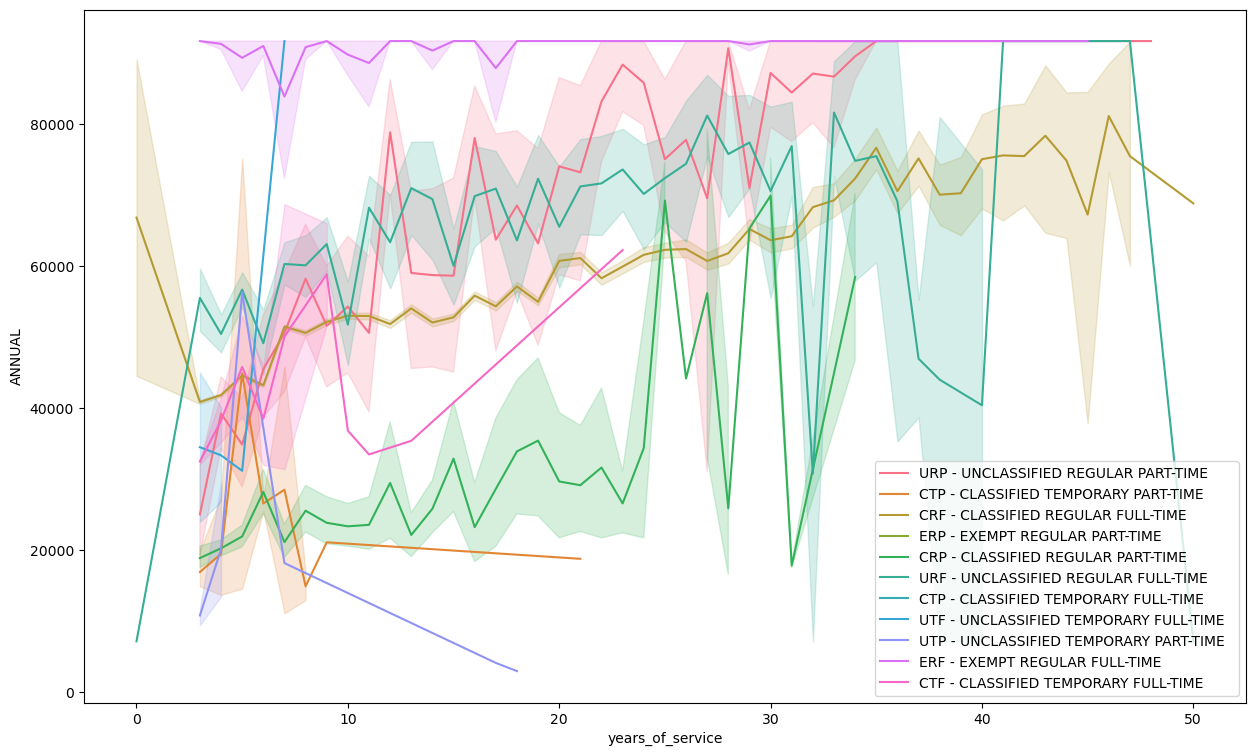

In [61]:
plt.figure(figsize=(15,9))
sns.lineplot(x='years_of_service', y='ANNUAL',hue ='STATUS', data= df)
plt.legend()
plt.show()

In [62]:
df.pivot_table(values = ['ANNUAL', 'years_of_service'], index = ['CLASS TITLE','STATUS'], aggfunc = 'mean')

,,ANNUAL,years_of_service
CLASS TITLE,STATUS,,
14 CUSTOMER SERVICES REP,URF - UNCLASSIFIED REGULAR FULL-TIME,40403.177143,4.857143
19 EXECUTIVE ASSISTANT,URF - UNCLASSIFIED REGULAR FULL-TIME,64992.960000,6.500000
20 PROGRAM SPECIALIST III,URF - UNCLASSIFIED REGULAR FULL-TIME,59445.274286,12.571429
21 BUSINESS ANALYST,URF - UNCLASSIFIED REGULAR FULL-TIME,64422.800000,19.333333
21 SYSTEMS ADMINISTRATOR III,URF - UNCLASSIFIED REGULAR FULL-TIME,58375.020000,5.500000
...,...,...,...
WRITING SPEC I,URF - UNCLASSIFIED REGULAR FULL-TIME,39249.960000,5.500000
WRITING SPEC II,URF - UNCLASSIFIED REGULAR FULL-TIME,42999.960000,9.000000
WRITING SPECIALIST III,URF - UNCLASSIFIED REGULAR FULL-TIME,49451.920000,16.333333


In [64]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for i in range(0,df.shape[1]):
    if df.dtypes[i]=='object':
        df[df.columns[i]] = label.fit_transform(df[df.columns[i]])
        
        
df

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,ANNUAL,STATE NUMBER,year_of_employment,years_of_service
0,241,17,30461,15274,22,1409,711,5,1,8,947,75.96150,29.0,91617.18,127717,1988,35
1,212,48,30461,15274,22,616,560,5,1,4,605,81.04454,4.0,16857.24,127717,2015,8
2,241,17,33197,10053,10,1409,711,5,1,8,610,75.96150,29.0,91617.18,59115,2020,3
3,212,48,33197,10053,10,616,560,5,1,4,4268,81.04453,4.0,16857.24,59115,2018,5
4,696,88,26462,6953,0,810,292,3,0,0,3209,0.00000,40.0,39411.24,165030,2020,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,76,37355,10053,16,1042,1198,5,1,0,5308,0.00000,40.0,34788.00,770781,2017,6
149477,809,76,37780,7024,1,84,1404,5,0,0,3444,0.00000,40.0,66000.00,847431,2015,8
149478,809,76,38068,5571,3,4,324,5,1,1,5062,12.93000,20.0,13447.20,34266,2012,11
149479,809,76,38313,6089,18,278,1007,5,1,0,4677,0.00000,40.0,68929.92,123490,1989,34


In [65]:
# X= df.drop(['AGENCY','AGENCY NAME','LAST NAME' ,'FIRST NAME','MI','EMPLOY DATE','STATE NUMBER','year_of_employment', 'ANNUAL'], axis=1)
# y=df['ANNUAL']

In [66]:
X_new =df.drop(['EMPLOY DATE','ANNUAL', 'STATE NUMBER'], axis=1)
y=df[['ANNUAL']]

In [67]:
X_new.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,year_of_employment,years_of_service
0,241,17,30461,15274,22,1409,711,5,1,8,75.96150,29.0,1988,35
1,212,48,30461,15274,22,616,560,5,1,4,81.04454,4.0,2015,8
2,241,17,33197,10053,10,1409,711,5,1,8,75.96150,29.0,2020,3
3,212,48,33197,10053,10,616,560,5,1,4,81.04453,4.0,2018,5
4,696,88,26462,6953,0,810,292,3,0,0,0.00000,40.0,2020,3


In [68]:
y.head()

,ANNUAL
0,91617.18
1,16857.24
2,91617.18
3,16857.24
4,39411.24


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [73]:
from sklearn.preprocessing import StandardScaler

In [75]:
from sklearn.model_selection import cross_val_score

In [79]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

#  Model selection and model preparation

In [88]:
X_new.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,year_of_employment,years_of_service
0,241,17,30461,15274,22,1409,711,5,1,8,75.96150,29.0,1988,35
1,212,48,30461,15274,22,616,560,5,1,4,81.04454,4.0,2015,8
2,241,17,33197,10053,10,1409,711,5,1,8,75.96150,29.0,2020,3
3,212,48,33197,10053,10,616,560,5,1,4,81.04453,4.0,2018,5
4,696,88,26462,6953,0,810,292,3,0,0,0.00000,40.0,2020,3


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size=0.2, random_state=42)

In [90]:
X_train.shape, X_test.shape

((119584, 14), (29897, 14))

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [97]:
def fitAndPredict(model):
    """The following code makes faster to evaluate a model 
    automating the fit and accuracy process"""
    
    model.fit(X_train_scaled, y_train)
    prediction = model.predict(X_test_scaled)
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print("Train R2 :", model.score(X_train_scaled, y_train))
    print("Test R2: ", model.score(X_test_scaled, y_test))
    print("Cross Validation Score: ", scores.mean())
    return 'model ran succesfully!'

In [98]:
model1 = LinearRegression()
model2 = Lasso()
model3 = Ridge()
model4 = XGBRegressor()
models = [model1,model2, model3, model4]
i = 0
for model in models:
    i +=1
    print("Model ", i,":", model)
    print(fitAndPredict(model))

Model  1 : LinearRegression()
Train R2 : 0.2626076024375271
Test R2:  0.2643534884011228
Cross Validation Score:  0.2622364243102962
model ran succesfully!
Model  2 : Lasso()
Train R2 : 0.26258161564713134
Test R2:  0.2645762752416033
Cross Validation Score:  0.26220249149375946
model ran succesfully!
Model  3 : Ridge()
Train R2 : 0.26260758384281757
Test R2:  0.26436010245635444
Cross Validation Score:  0.26223639725620884
model ran succesfully!
Model  4 : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=

In [99]:
model4.score(X_train_scaled, y_train)

0.9278273648827506

In [100]:
y_preds = model4.predict(X_test_scaled)

In [101]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [102]:
rmse = np.sqrt(mean_squared_error(y_test, y_preds)) #RSME
print(rmse)
print(mean_squared_error(y_test, y_preds))
print(r2_score(y_test, y_preds))

5414.180145623776
29313346.649266694
0.9147423942769647


In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
random_forest_model = RandomForestRegressor(n_estimators=100, verbose=0, random_state=0)
random_forest_model.fit(X_train_scaled,y_train)
forest_pred = random_forest_model.predict(X_test_scaled)
print(mean_absolute_error(forest_pred, y_test))

2380.7510479111793


In [106]:
print(r2_score(y_test, forest_pred))

0.9415848755647321
